In [21]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 12
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 14  
plt.rcParams["xtick.labelsize"] = 12  
plt.rcParams["ytick.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 16 
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [41]:
dj = dijet.DIJET(3, constrained_moments=True)
dj.load_params('replica_params_pp.csv')
dj.set_params(3)

points = 7
lumi = 100
roots = 145

pT_values = np.linspace(1, 30, 20)

space = {
    'y' : [0.05, 0.95],
    'z' : [0.2, 0.5],
    'min Q2' : 5,
    't' : [0.005, 0.04],
    # 'max Q2' : 30
}

data = {}
for weight in ['den', 'den error', '1', 'cos(phi_Dp)', 'cos(phi_kp)cos(phi_Dp)', 'sin(phi_kp)sin(phi_Dp)']:
    data[weight] = []
    
for pT in pT_values:

    den = dj.integrated_denominator_approx(pT, roots**2, space, weight='1', points=points, r0=1.7)
    den_error = dj.integrated_denominator_approx(pT, roots**2, space, weight='1', points=points, r0=1.7)
    data['den'].append(den)
    data['den error'].append(den_error)
    
    for weight in ['1', 'cos(phi_Dp)', 'cos(phi_kp)cos(phi_Dp)', 'sin(phi_kp)sin(phi_Dp)']:

        num = dj.integrated_numerator_approx(pT, roots**2, space, weight=weight, points=points, r0=2)
        data[weight].append(num)

for weight in data:
    data[weight] = np.array(data[weight])


Using constrained moment parameters
loaded N(r^2, s) data from narr_ymin4.61_ymax14.91_AAMS09.dat
loaded polarized amp data from /Users/brandonmanley/Desktop/PhD/dijet_dsa/dsa_mc/dipoles/d05-rc/
loaded params from replica_params_dis.csv
loaded random moment params from /dipoles/moment_params_dis.csv
loaded replica 3
loaded params from replica_params_pp.csv
loaded random moment params from /dipoles/moment_params_pp.csv
loaded replica 3


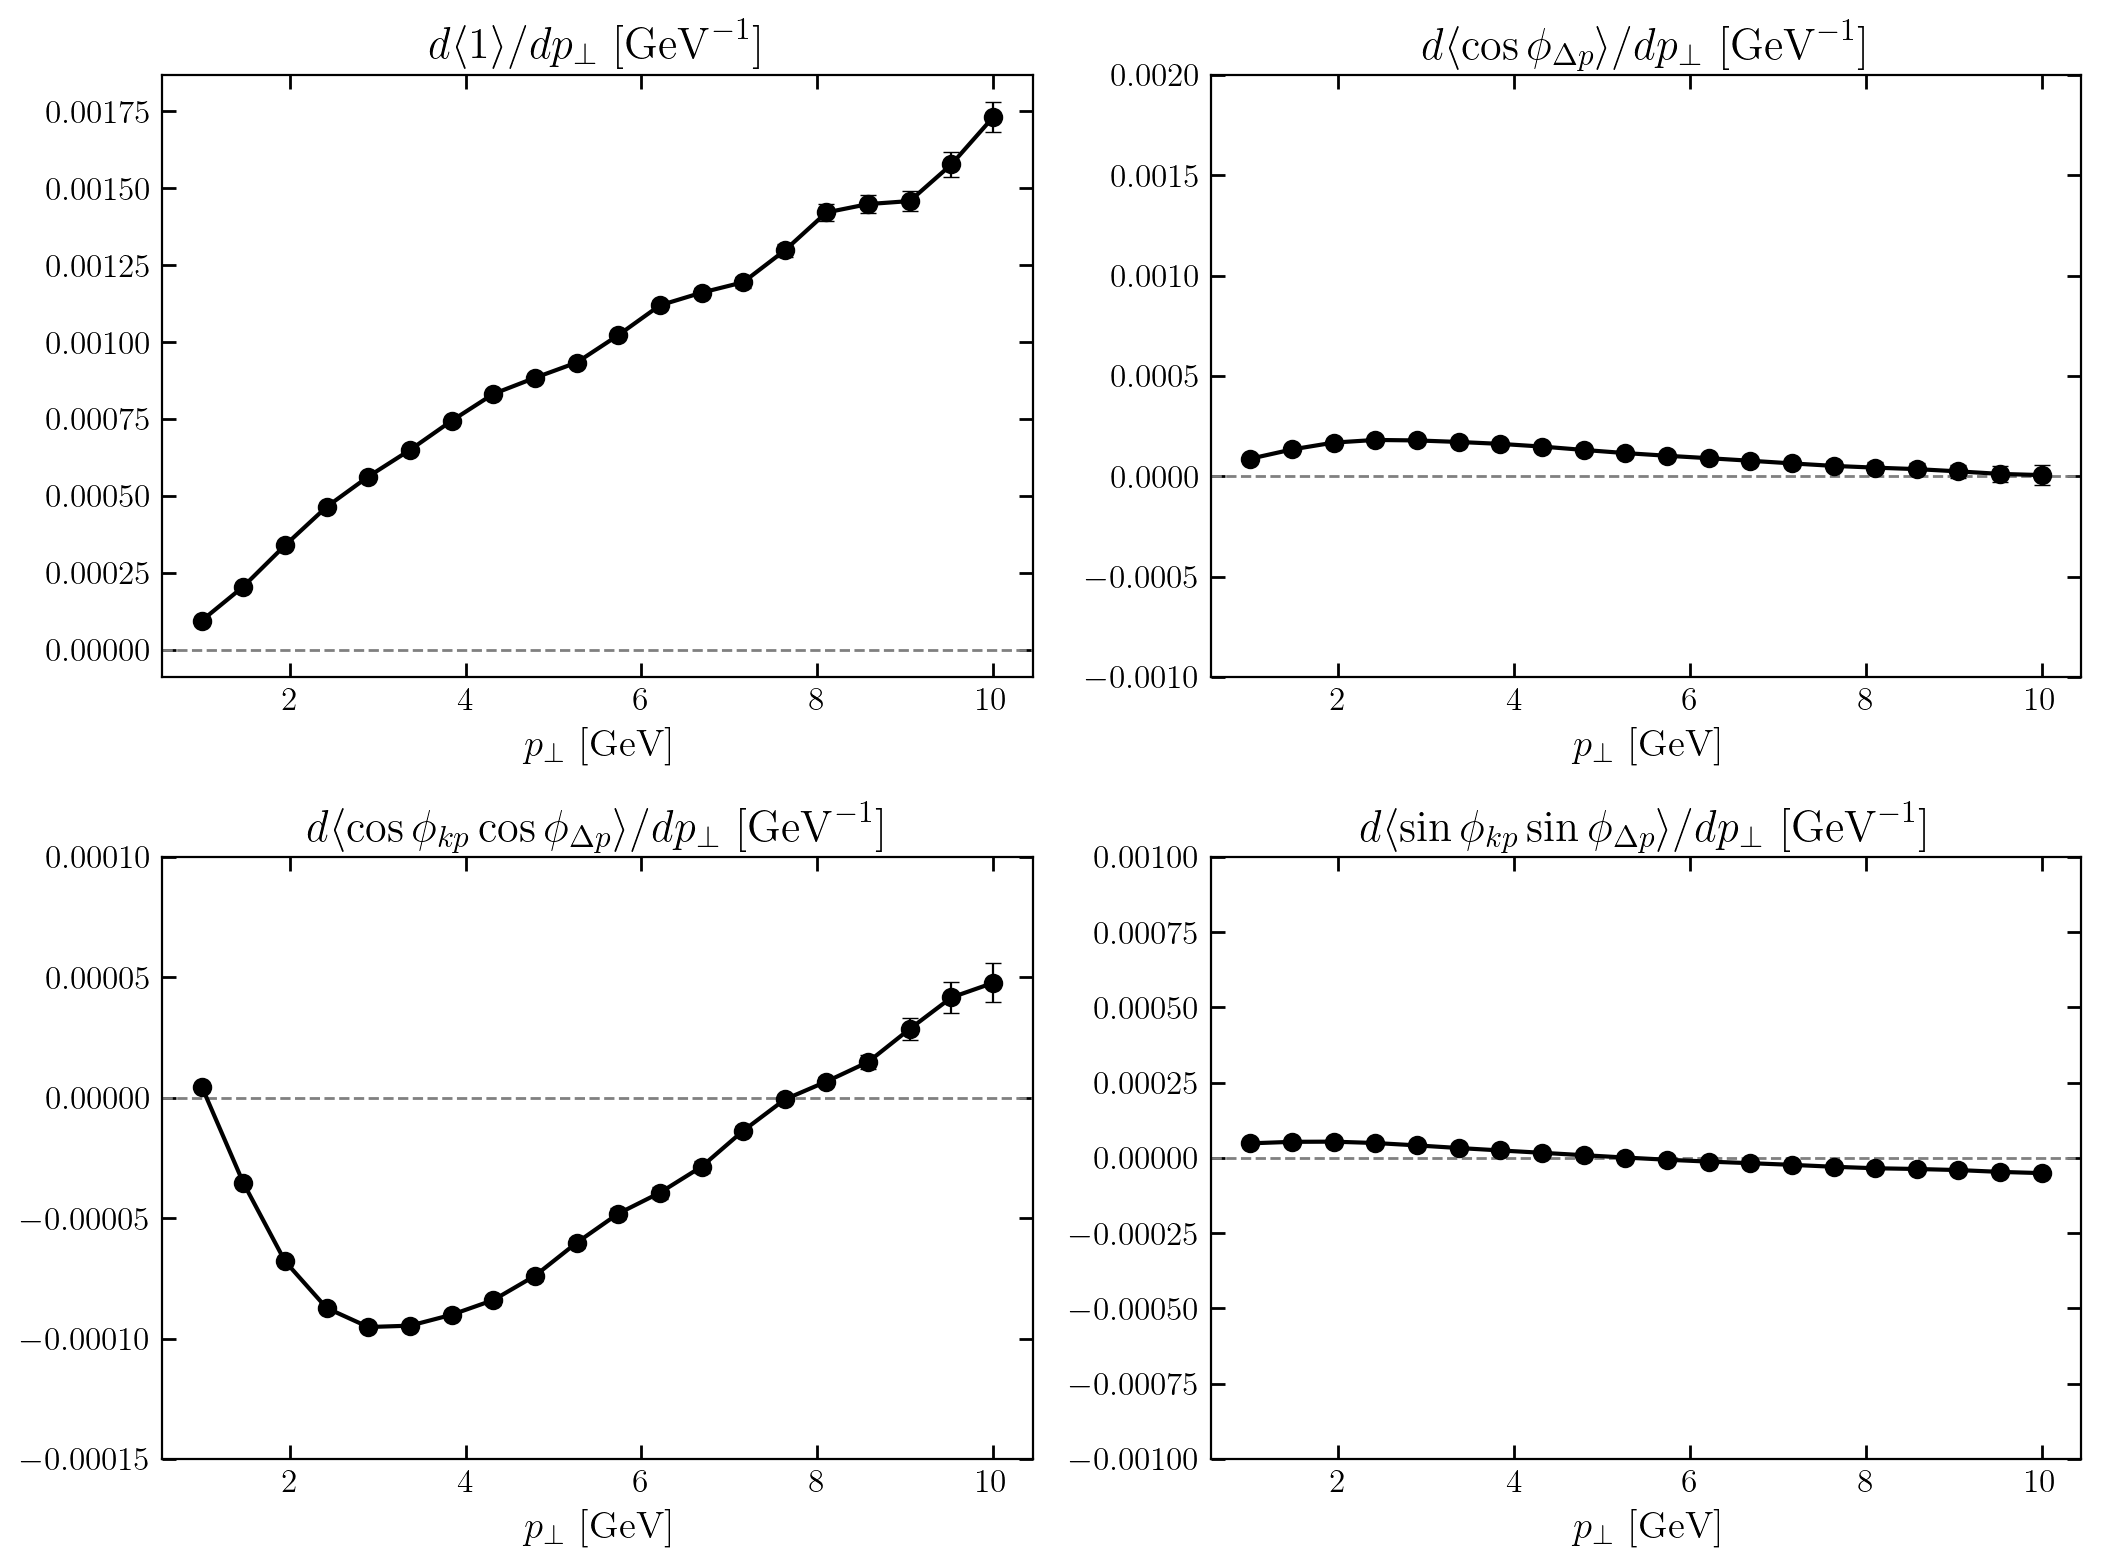

In [39]:

asp_ratio = 4/3
psize = 4
nrows, ncols = 2,2
fig, ax = plt.subplots(2, 2, figsize=(asp_ratio*psize*2, psize*2))
axs = [[irow, icol] for irow in range(nrows) for icol in range(ncols)]

data['<1>'] = data['1']/data['den']
data['<cos(phi_Dp)>'] = data['cos(phi_Dp)']/data['den']
data['<cos(phi_kp)cos(phi_Dp)>'] = data['cos(phi_kp)cos(phi_Dp)']/data['den']
data['<sin(phi_kp)sin(phi_Dp)>'] = data['sin(phi_kp)sin(phi_Dp)']/data['den']

data['<1> error'] = np.sqrt( (np.abs(data['1'])/data['den'])*(1/(data['den']*lumi)) ) 
data['<cos(phi_Dp)> error'] = np.sqrt( (np.abs(data['1'])/data['den'])*(1/(data['den']*lumi)) ) 
data['<cos(phi_kp)cos(phi_Dp)> error'] = np.sqrt( (np.abs(data['cos(phi_kp)cos(phi_Dp)'])/data['den'])*(1/(data['den']*lumi)) ) 
data['<sin(phi_kp)sin(phi_Dp)> error'] = np.sqrt( (np.abs(data['sin(phi_kp)sin(phi_Dp)'])/data['den'])*(1/(data['den']*lumi)) ) 


for iw, weight in enumerate(['1', 'cos(phi_Dp)', 'cos(phi_kp)cos(phi_Dp)', 'sin(phi_kp)sin(phi_Dp)']):
    ax[*axs[iw]].errorbar(
        pT_values, data[f'<{weight}>'], yerr=data[f'<{weight}> error'], marker='o',
        capsize=3, elinewidth=0.8, capthick=0.5, 
        color='black'
    )

# axs[0,0].set_ylim([-0.02, 0.07])
ax[0,1].set_ylim([-0.001, 0.002])
ax[1,0].set_ylim([-0.00015, 0.0001])
ax[1,1].set_ylim([-0.001, 0.001])

ax[0,0].set_title(fr'$d \langle 1 \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')
ax[0,1].set_title(fr'$d \langle \cos \phi_{{\Delta p}} \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')
ax[1,0].set_title(fr'$d \langle \cos \phi_{{k p}} \cos \phi_{{\Delta p}}  \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')
ax[1,1].set_title(fr'$d \langle \sin \phi_{{k p}} \sin \phi_{{\Delta p}}  \rangle /d p_\perp \,\,[\mathrm{{GeV}}^{{-1}}]$')


for iax in ax:
    for jax in iax:
        jax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
        jax.set_xlabel(r'$p_{\perp}$ [GeV]')
        jax.tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
        jax.axhline(y=0, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()

# if plot_bands:
#     fig.savefig('plots/dsa_band.pdf', dpi=400, bbox_inches="tight")
# else:
#     fig.savefig('plots/dsa_lines.pdf', dpi=400, bbox_inches="tight")

